In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('PastHires.csv')
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [3]:
le=LabelEncoder()
print(data.columns)
data['Employed?']=le.fit_transform(data['Employed?'])
data['Level of Education']=le.fit_transform(data['Level of Education'])
data['Top-tier school']=le.fit_transform(data['Top-tier school'])
data['Interned']=le.fit_transform(data['Interned'])
data['Hired']=le.fit_transform(data['Hired'])

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')


In [4]:
x=data.iloc[:,0:6]
y=data.iloc[:,-1]

In [5]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25)

In [6]:
model=RandomForestClassifier(n_estimators=10,bootstrap=True,max_features='sqrt')

In [7]:
model.fit(train_x,train_y)

RandomForestClassifier(max_features='sqrt', n_estimators=10)

In [8]:
model.predict([[10,1,4,0,0,0]])
y_pred=model.predict(test_x)

In [9]:
roc_val=roc_auc_score(test_y,y_pred)

In [10]:
roc_val

0.8333333333333333

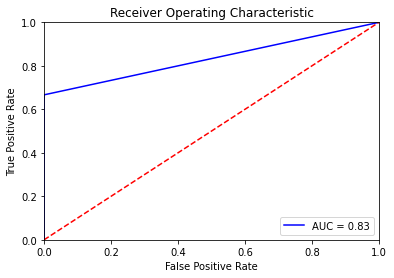

In [11]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#preds = y_pred[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, y_pred)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()